<a href="https://colab.research.google.com/github/Sonarajan04/NLP_projects/blob/main/NLP_SMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('/content/drive/MyDrive/datasets/SMS_train.csv',encoding='ISO-8859-1')
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [3]:
df2=pd.read_csv('/content/drive/MyDrive/datasets/SMS_test.csv',encoding='ISO-8859-1')
df2

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [4]:
df=pd.concat([df1,df2],ignore_index=True)
df.head(6)

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
5,6,REMINDER FROM O2: To get 2.50 pounds free call...,Spam


In [5]:
df.shape

(1082, 3)

In [6]:
df.drop(['S. No.'],axis=1,inplace=True)
df.head(3)

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam


<Axes: xlabel='Label', ylabel='count'>

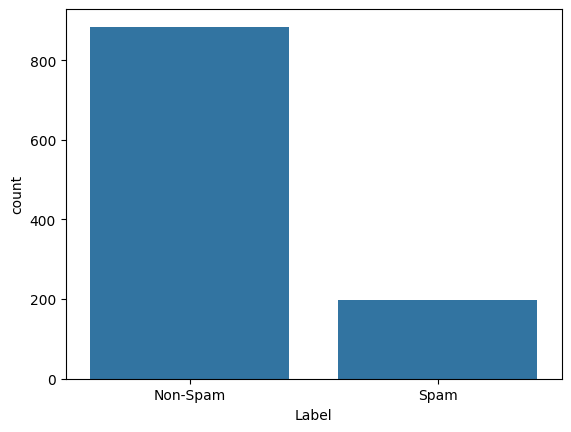

In [7]:
import seaborn as sns
sns.countplot(x='Label',data=df)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Label']=le.fit_transform(df['Label'])
df.head(2)

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0


In [9]:
tweets=df.Message_body
tweets.head(4)

0                           Rofl. Its true to its name
1    The guy did some bitching but I acted like i'd...
2    Pity, * was in mood for that. So...any other s...
3                 Will ü b going to esplanade fr home?
Name: Message_body, dtype: object

In [10]:
tweets=tweets.str.replace('[^a-zA-z0-9]+',' ')
tweets.head(3)

0                           Rofl. Its true to its name
1    The guy did some bitching but I acted like i'd...
2    Pity, * was in mood for that. So...any other s...
Name: Message_body, dtype: object

In [11]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [12]:
tweets=tweets.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:' '.join(token))
tweets.head(5)

0                            rofl . it true to it name
1    the guy did some bitch but i act like i'd be i...
2    piti , * was in mood for that . so ... ani oth...
3                    will ü b go to esplanad fr home ?
4    this is the 2nd time we have tri 2 contact u ....
Name: Message_body, dtype: object

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
tweets=tweets.apply(lambda x:[token for token in tk.tokenize(x) if token not in sw]).apply(lambda token:' '.join(token))
tweets.head(5)

0                                     rofl . true name
1    guy bitch act like i'd interest buy someth els...
2                    piti , * mood . ... ani suggest ?
3                            ü b go esplanad fr home ?
4    2nd time tri 2 contact u . u £ 750 pound prize...
Name: Message_body, dtype: object

In [15]:
#vectorization

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
X=vector.fit_transform(tweets)
print(X)

  (0, 1866)	0.5086856793431559
  (0, 2762)	0.5352804139572925
  (0, 2284)	0.6743246681420617
  (1, 1192)	0.19084717659108363
  (1, 2823)	0.2620897628588603
  (1, 1238)	0.3166286972359124
  (1, 2911)	0.22002695063463382
  (1, 1898)	0.25587622919424974
  (1, 1036)	0.29329608266677626
  (1, 2477)	0.26551480891862445
  (1, 674)	0.26551480891862445
  (1, 1484)	0.307577621142851
  (1, 1636)	0.20980773882403927
  (1, 392)	0.3419878575694143
  (1, 603)	0.36211655551990307
  (1, 1312)	0.2588858462402129
  (2, 2578)	0.5165656915002457
  (2, 459)	0.36716239650585775
  (2, 1819)	0.5469696796701571
  (2, 2061)	0.5469696796701571
  (3, 1391)	0.3883344606933877
  (3, 1188)	0.630740525885995
  (3, 1064)	0.5956800313099777
  (3, 1267)	0.3106896135077221
  (4, 1874)	0.30932958639486785
  :	:
  (1079, 1836)	0.2633677871797729
  (1079, 2583)	0.2544650331411059
  (1079, 1624)	0.2410408066920934
  (1079, 624)	0.23101411970886698
  (1079, 2681)	0.4820816133841868
  (1079, 1750)	0.21063371947658105
  (1079, 1

In [17]:
vector.get_feature_names_out()

array(['000', '0121', '02', ..., 'zed', 'zero', 'ú1'], dtype=object)

In [18]:
X.shape

(1082, 3039)

In [19]:
y=df['Label']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Label, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [22]:
from sklearn.svm import SVC
sv=SVC()

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [24]:
from sklearn.metrics import classification_report

In [25]:
lst=[knn,sv,rf]
for i in lst:
  print('**************',i,'*************')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

************** KNeighborsClassifier() *************
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       260
           1       0.96      0.40      0.57        65

    accuracy                           0.88       325
   macro avg       0.92      0.70      0.75       325
weighted avg       0.89      0.88      0.86       325

************** SVC() *************
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       260
           1       1.00      0.51      0.67        65

    accuracy                           0.90       325
   macro avg       0.95      0.75      0.81       325
weighted avg       0.91      0.90      0.89       325

************** RandomForestClassifier() *************
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       260
           1       0.96      0.75      0.84        65

    accuracy                           0.

In [26]:
type(X)

scipy.sparse._csr.csr_matrix

In [27]:
#converting x to an array

In [28]:
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
y_new=sv.predict(vector.transform(['boy first']))
y_new

array([0])